# WebScraping with Selenium

This notebook shows how use selenium to scrape data from an e-commerce web site.
The scope is only to understand the capabilities of web scraping and prepare a dataset for academic purporse.

Let’s begin writing our scraper!

We will first install important modules and packages for our Notebook


*   Selenium
*   Chromium-chromedriver



In [2]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 9.1MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [44.8 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates In

And now we will import some modules on our Notebook


1.   sys: to setup the path of chrome driver
2.   selenium: to emulate the user behaviour
3.   pandas: to work with data
4.   tqdm: to show a progress bar in our notebook
5.   json: to work with json format





In [35]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

First we need to set the options for the ghost browser.
The most important is `--headless` because we are in a "cloud" ntotebook. In our local notebook we can remove the `--headless` option.  


In [36]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("window-size=1900,800")
chrome_options.add_argument("--enable-javascript")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36")

`webdriver` is the most importa object in Selenium.
With `webdriver` we can start the phantom browser, emulate the user navigation and scrape our data. 

Let’s now create a new instance of google chrome.


We will navitage to page by a `get` request. With http we can do a get or a post (or others but they are not important for us): https://www.w3schools.com/tags/ref_httpmethods.asp 



```
wd.get("https://www.crunchbase.com/discover/organization.companies")
```



In [37]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("http://startup.registroimprese.it/isin/search?0")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Take a look to the screenshot from our phantom browser.

Note:
- la language and the locale: It is en_US!
- the screen ration: is it the same of our notebook?

Populating the interactive namespace from numpy and matplotlib


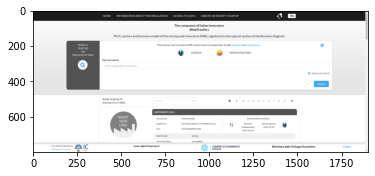

In [6]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

Let's try to extract some information from the page



`title` contains the title of our page.




In [7]:
print(wd.title)

startup and innovative SMEs


### How do we extract the values inside a page with CSS Selector?

Selenium has a method called `find_elements_by_css_selector`.

We will pass our CSS Selector into this method and get a list of selenium elements. Once we have the element, we can extract the text inside it using the `text` function.

In [8]:
list_companies = wd.find_elements_by_css_selector("a.link")
print(len(list_companies))

10


In [9]:
print(list_companies[0].text)

SAPORARTE S.R.L.


# Extract the start-up list

Let's begin to download the list of companies.

The list of companies is defined by the css selection rule
`div.searchCompanyCard`



In [11]:
list_companies = wd.find_elements_by_css_selector("div.searchCompanyCard")
print(len(list_companies))

10


Gread! We find 10 items!

Now, we will extract the attribute from each single element.
The scope is to create one dict for each item in the list with the attribute:


1.   company name
2.   link to the detail page
3.   number of employees
4.   vat code
5.   economic sector
6.   tags



In [25]:
import pprint
import time
items = []
for item in list_companies:
    company_name = item.find_elements_by_css_selector("a.link")[0].text
    url = item.find_elements_by_css_selector("a")[0].get_attribute("href")
    vat_code = item.find_elements_by_css_selector("div.ten")[0].text
    number_of_employees = item.find_elements_by_css_selector("div.twelve")[3].text
    economic_sector = item.find_elements_by_css_selector("div.twelve")[1].text
    tags = item.find_elements_by_css_selector("div.sixteen")[2].text

    items.append({'company_name': company_name,
                  'url': url,
                  'vat_code': vat_code,
                  'number_of_employees': number_of_employees,
                  'tags': tags,
                  'economic_sector': economic_sector})


pprint.pprint(items[0:5])

[{'company_name': 'SAPORARTE S.R.L.',
  'economic_sector': '6201',
  'number_of_employees': 'unavailable',
  'tags': 'tracciabilita GestioneMagazzino etichettatura',
  'url': 'http://www.saporarte.it/',
  'vat_code': '05349130285'},
 {'company_name': 'DOCTORIUM S.R.L.',
  'economic_sector': '6201',
  'number_of_employees': 'unavailable',
  'tags': 'MEDICALE',
  'url': 'https://www.doctorium.it/',
  'vat_code': '03504140793'},
 {'company_name': 'OREN S.R.L.',
  'economic_sector': '6312',
  'number_of_employees': 'unavailable',
  'tags': 'Blockchain Moda',
  'url': 'http://www.brand2store.com/',
  'vat_code': '11326710966'},
 {'company_name': 'SAVINO SOLUTION S.R.L.',
  'economic_sector': '6201',
  'number_of_employees': '5-9 employees',
  'tags': 'DIGITALIZZAZIONE dematerializzazione BLOCKCHAIN',
  'url': 'http://www.savinosolution.com/',
  'vat_code': '05141260652'},
 {'company_name': "PCUP S.R.L. start-up costituita a norma dell'art. 4 comma "
                  '10 bis del decreto leg

In [ ]:
len(items)

24

In [38]:
import pprint
import time
items = []
page = 1
end = False
wd.get("http://startup.registroimprese.it/isin/search?0")
while (not end and page < 5):
  print(f"Get data from {page} page...")
  time.sleep(1)
  list_companies = wd.find_elements_by_css_selector("div.searchCompanyCard")
  for item in list_companies:
      company_name = item.find_elements_by_css_selector("a.link")[0].text
      print(company_name)
      if (len(item.find_elements_by_css_selector("a")) > 1):
        url = item.find_elements_by_css_selector("a")[0].get_attribute("href")

      vat_code = item.find_elements_by_css_selector("div.ten")[0].text
      number_of_employees = item.find_elements_by_css_selector("div.twelve")[3].text
      economic_sector = item.find_elements_by_css_selector("div.twelve")[1].text
      tags = item.find_elements_by_css_selector("div.sixteen")[2].text

      items.append({'company_name': company_name,
                    'url': url,
                    'vat_code': vat_code,
                    'number_of_employees': number_of_employees,
                    'tags': tags,
                    'economic_sector': economic_sector})
  try:
    wd.find_elements_by_css_selector("i.right")[0].click()
    page = page + 1
  except:
    end = True

Get data from 1 page...
SAPORARTE S.R.L.
DOCTORIUM S.R.L.
OREN S.R.L.
SAVINO SOLUTION S.R.L.
PCUP S.R.L. start-up costituita a norma dell'art. 4 comma 10 bis del decreto legge 24 gennaio 2015, n. 3
PROBIOMICS CARE S.R.L.
LABORATORIO DENTALE SANTA TERESA S.R.L.
MEDICUD SRL
R-DATA S.R.L.
SHOP-O-RAMA S.R.L.
Get data from 2 page...
INNOVACARE S.R.L.
LINEARBI S.R.L.
HUB77 S.R.L.
NGV POWERTRAIN S.R.L.
WILSON S.R.L.
AG TECHNOLOGIES & INVESTMENTS S.R.L. START-UP COSTITUITA A NORMA DELL'ART. 4 CO. 10 BIS DEL D.L. 24 GENNAIO 2015, N.3, ISCRITTA PROVVISORIAMENTE IN SEZIONE ORDINARIA, IN CORSO DI ISCRIZIONE IN SEZIONE SPECIALE
NOVIA S.R.L.
HEJ! S.R.L.
IINFORMATICA S.R.L.
HIGECO ENERGY S.R.L.
Get data from 3 page...
HEVOR SRL
IMPRESA SOCIALE FORMEVER LAB SOCIETA' COOPERATIVA SOCIALE
4. ZERO S.R.L.
ANTICA TESSITURA VENETA S.R.L.
3 UP S.R.L.
STUDIO 5T S.R.L. STARTUP COSTITUITA AI SENSI DELL'ART. 4, C. 10-BIS, D.L. 3/2015 CONVERTITO CON LEGGE N. 33/2015
TEA EVERYWHERE S.R.L.
PIRMAN SOCIETA' A RESPONSA

In [39]:
len(items)

40

# Pandas and data processing

**Well!**
We're starting to see another amazing library for working with data!

It's **pandas**: *Python library for data analysis*.

Basically, with pandas we can manipulate a data set or a historical series in Python.

For now, we start to give a couple of concepts.

Pandas is based on two types of data: **Series** and **DataFrame**:
- `Series` represents a list of data
- `DataFrame` represent a data set in tabular format

Each column of a `DataFrame` is a `Series`.

We can create a `DataFrame` using the `pd.DataFrame` method by passing our dictionary as an input parameter.

A `DataFrame` pandas can be easily exported in *CSV*, *Excel*, ...

For more information about `Pandas` see

https://pandas.pydata.org/getting_started.html


In [40]:
import pandas as pd
ds_items = pd.DataFrame(items)
ds_items.set_index("vat_code")
ds_items.head()

,company_name,url,vat_code,number_of_employees,tags,economic_sector
0,SAPORARTE S.R.L.,http://www.saporarte.it/,05349130285,unavailable,tracciabilita GestioneMagazzino etichettatura,6201
1,DOCTORIUM S.R.L.,https://www.doctorium.it/,03504140793,unavailable,MEDICALE,6201
2,OREN S.R.L.,http://www.brand2store.com/,11326710966,unavailable,Blockchain Moda,6312
3,SAVINO SOLUTION S.R.L.,http://www.savinosolution.com/,05141260652,5-9 employees,DIGITALIZZAZIONE dematerializzazione BLOCKCHAIN,6201
4,PCUP S.R.L. start-up costituita a norma dell'a...,http://pcup.it/,10243190963,0-4 employees,beverage IoT payments,6201


In [41]:
ds_items.to_csv('ds_items.csv')